## Import

In [ ]:
import pandas as pd
import numpy as np

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

import seaborn as sns
import matplotlib.pyplot as plt

import os

import warnings
warnings.filterwarnings(action='ignore')

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# Gdrive

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/MyDrive/데이콘/신용카드 사기 거래 탐지 AI 경진대회')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/데이콘/신용카드 사기 거래 탐지 AI 경진대회'

In [ ]:
os.listdir()

['[rodustScale]_Anomaly Detection with IsolationForest (비지도학습).ipynb',
 'open.zip의 사본',
 'open',
 'submit.csv',
 'sequence_api.png',
 'func_api.png',
 '2022 07 20',
 '[Baseline]_Anomaly Detection with IsolationForest (비지도학습).ipynb',
 '[비지도학습] creditcard_fraud.ipynb',
 'Histograms.png',
 '[EDA]_Anomaly Detection with IsolationForest (비지도학습).ipynb']

## Data Load

In [ ]:
train_df = pd.read_csv('./open/train.csv') # Train
print(train_df.shape)
print(type(train_df))
train_df.tail()

(113842, 31)
<class 'pandas.core.frame.DataFrame'>


,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
113837,284796,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,8.655320,-1.052365,2.834865,1.088141,1.288401,-0.931503,1.067864,0.586179,-0.085524,-0.571605,3.490065,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,-0.169496,1.034857
113838,284797,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,0.120908,-1.134176,0.677729,0.345928,0.002019,-0.679626,-0.549982,-0.199950,-0.420551,-0.283278,-0.153997,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,0.530986,1.034881
113839,284798,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,-0.612982,-0.066655,-0.732987,0.237948,-0.293959,-0.245496,-0.174846,-0.891169,-0.290491,-0.139512,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,-0.230699,1.034904
113840,284802,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,0.644837,0.190916,-0.546329,-0.731707,-0.808036,0.599628,0.070441,0.373110,0.128904,0.000676,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,-0.269825,1.034939
113841,284803,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,1.034951


In [ ]:
val_df = pd.read_csv('./open/val.csv') # Validation
print(val_df.shape)
val_df.tail()

(28462, 32)


,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
28457,284769,-0.546378,1.433992,-0.313252,0.926044,0.522388,-0.565669,1.066075,0.269799,-1.099446,-0.077753,0.534689,0.748099,-0.338301,1.018502,-1.058923,-0.914161,0.143397,0.154285,1.000673,0.007075,0.228159,0.778817,-0.175451,0.030397,0.018381,-0.395994,0.301655,0.173585,0.202753,1.034622,0
28458,284779,-0.764523,0.588379,-0.907599,-0.418847,0.901528,-0.760802,0.758545,0.414698,-0.730854,-1.245088,0.874312,0.162691,-1.011819,-0.317789,-0.887823,0.482847,0.681412,0.486991,-0.022064,0.024870,0.003530,-0.431876,0.141759,0.587119,-0.200998,0.267337,-0.152951,-0.065285,0.810452,1.034693,0
28459,284790,-0.446951,1.302212,-0.168583,0.981577,0.578957,-0.605641,1.253430,-1.042610,-0.417116,0.076605,-1.291228,-0.690868,-1.481724,0.753473,-0.191141,-1.129904,0.319074,-0.201862,0.744416,-0.203306,0.851800,0.305268,-0.148093,-0.038712,0.010209,-0.362666,0.503092,0.229921,0.537972,1.034763,0
28460,284801,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,0.523316,0.559047,-0.834660,0.626211,-0.541494,0.225361,-0.605252,-0.163049,0.561695,-0.256922,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,-0.269964,1.034928,0
28461,284806,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,1.034975,0


In [ ]:
# null값 없음
# print(train_df.isnull().sum())
# print(val_df.isnull().sum())

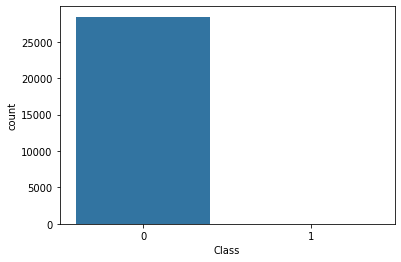

In [ ]:
# Target Class 분포
sns.countplot(x='Class', data=val_df);

In [ ]:
val_df['Class'].value_counts(normalize=True)

0    0.998946
1    0.001054
Name: Class, dtype: float64

In [ ]:
train_df.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
count,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,1.138420e+05,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000
mean,142025.527837,0.000197,0.001289,0.009717,-0.004169,0.000475,0.005141,0.005769,-0.002451,-0.002107,0.005209,-0.001686,0.003944,0.002043,0.004397,-0.000500,0.002905,0.003397,0.001114,0.000300,-0.000500,-0.001242,4.088347e-07,-0.001317,-0.000884,0.001680,-0.000293,-0.000234,-0.000508,0.927253,0.116232
std,82248.545392,1.951060,1.651064,1.496916,1.412633,1.367533,1.330583,1.204111,1.185504,1.095415,1.071337,1.014689,0.977039,0.994908,0.933753,0.915666,0.864903,0.808552,0.830763,0.814542,0.763326,0.722001,7.238291e-01,0.636061,0.605854,0.520069,0.480979,0.399505,0.356130,3.412933,0.558161
min,3.000000,-56.407510,-72.715728,-32.454198,-5.600607,-42.147898,-26.160506,-41.506796,-50.943369,-13.434066,-24.403185,-4.682931,-18.553697,-3.844974,-15.623187,-4.152532,-13.303888,-21.297906,-8.668815,-4.932733,-28.009635,-22.757540,-8.887017e+00,-44.807735,-2.824849,-10.295397,-1.855355,-9.895244,-9.617915,-0.307413,-0.994972
25%,70796.750000,-0.923479,-0.595602,-0.883877,-0.853728,-0.689853,-0.766094,-0.552071,-0.209492,-0.647477,-0.533477,-0.763105,-0.402650,-0.647334,-0.423962,-0.584307,-0.467574,-0.486154,-0.497362,-0.456712,-0.211935,-0.229710,-5.402665e-01,-0.162180,-0.355582,-0.315470,-0.326160,-0.070847,-0.053249,-0.230560,-0.360304
50%,141722.000000,0.012074,0.066390,0.183868,-0.019359,-0.054060,-0.272436,0.039036,0.020970,-0.052157,-0.090810,-0.034405,0.141434,-0.010847,0.052157,0.048524,0.066434,-0.066939,-0.004633,0.004657,-0.062891,-0.030281,8.345807e-03,-0.012261,0.040573,0.018278,-0.052815,0.001502,0.011158,-0.000699,-0.002590
75%,213359.500000,1.315373,0.801687,1.037120,0.742208,0.614214,0.405285,0.568750,0.328303,0.590705,0.455287,0.739737,0.619635,0.663362,0.494116,0.646540,0.525120,0.397480,0.500335,0.461655,0.133381,0.186001,5.287508e-01,0.147474,0.438225,0.353989,0.240838,0.091279,0.077851,0.768532,0.640653
max,284803.000000,2.454930,21.467203,4.187811,16.491217,34.801666,23.917837,44.054461,20.007208,10.392889,15.331742,10.446847,4.318071,4.569009,7.518403,5.784514,8.289890,9.253526,4.295648,4.715142,26.237391,27.202839,8.361985e+00,22.528412,4.022866,7.519589,3.119295,11.135740,33.847808,180.101027,1.034951


In [ ]:
val_df.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
count,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000
mean,142549.840138,0.004967,0.002014,0.001414,0.001893,-0.003969,-0.017730,0.005556,0.009023,-0.004905,-0.002299,0.004007,0.002480,0.004170,0.012299,0.003177,0.004913,0.007552,0.005733,0.000146,0.001928,0.000013,0.001224,0.001490,0.001355,0.002284,0.000520,-0.000520,-0.000265,0.924010,0.119916,0.001054
std,82252.851474,1.930640,1.605198,1.499749,1.405139,1.335147,1.292214,1.165132,1.103538,1.090843,1.084560,1.016507,0.990731,1.000558,0.938752,0.913747,0.864289,0.821528,0.833280,0.808897,0.729583,0.700859,0.721350,0.588076,0.603181,0.526864,0.484804,0.394235,0.304284,3.347555,0.558246,0.032449
min,10.000000,-29.516123,-38.305310,-30.177317,-5.071241,-21.577019,-16.172614,-31.197329,-26.278007,-9.462573,-22.187089,-4.453853,-16.060306,-3.848943,-14.952981,-4.391307,-12.675269,-20.740664,-8.153668,-4.197145,-18.292308,-14.004410,-8.555808,-25.356744,-2.807897,-6.035054,-1.596493,-9.793568,-8.364853,-0.307413,-0.994878,0.000000
25%,71260.000000,-0.915525,-0.598053,-0.873022,-0.852444,-0.698010,-0.774920,-0.546290,-0.210941,-0.642760,-0.540463,-0.755867,-0.408285,-0.638741,-0.411374,-0.572378,-0.461673,-0.474047,-0.491693,-0.463059,-0.212876,-0.226196,-0.542624,-0.160418,-0.352310,-0.322098,-0.328638,-0.071787,-0.052361,-0.226927,-0.357884,0.000000
50%,142683.500000,0.023586,0.075470,0.175784,-0.021619,-0.052780,-0.280742,0.046280,0.022622,-0.066623,-0.099386,-0.033527,0.137370,-0.012317,0.059680,0.053606,0.070931,-0.066174,0.000890,0.000397,-0.062481,-0.029430,0.008401,-0.011372,0.040076,0.016684,-0.049583,0.000488,0.012138,0.005589,0.002156,0.000000
75%,213612.750000,1.315578,0.803463,1.011563,0.739044,0.598712,0.377266,0.566825,0.323836,0.596308,0.452763,0.743699,0.618721,0.666392,0.500190,0.648310,0.521601,0.399337,0.509625,0.462772,0.131592,0.186905,0.528163,0.146094,0.441402,0.352930,0.241051,0.089100,0.080822,0.778278,0.641828,0.000000
max,284806.000000,2.411769,16.497472,4.226108,12.114672,24.345310,12.128950,26.237722,12.431140,7.937413,12.161890,10.853012,4.202685,4.465413,7.692209,3.845738,4.462229,6.983545,3.505916,5.591971,24.133894,22.599543,6.090514,18.946734,3.658746,5.525093,3.067907,8.708972,15.726807,165.948299,1.034975,1.000000


## V29, V30 feature의 평균이 다른 feature와 값이 큼
-> 스케일링 필요

In [ ]:
sdS_train_df = train_df.copy()
rbS_train_df = train_df.copy()
rbS02_train_df = train_df.copy()


In [ ]:
# # feature scaling (StandardScaler)
# from sklearn.preprocessing import StandardScaler

# sd_scaler = StandardScaler()
# sdS_train_df.loc[:, :] = sd_scaler.fit_transform(train_df)

# sdS_train_df.describe()

In [ ]:
# feature scaling (RobustScaler01)
from sklearn.preprocessing import RobustScaler

sd_scaler = RobustScaler()
rbS_train_df.loc[:, :] = sd_scaler.fit_transform(train_df)

rbS_train_df.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
count,113842.000000,113842.000000,1.138420e+05,113842.000000,1.138420e+05,1.138420e+05,113842.000000,1.138420e+05,1.138420e+05,113842.000000,113842.000000,113842.000000,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,113842.000000,1.138420e+05,1.138420e+05,113842.000000,113842.000000,1.138420e+05,113842.000000,1.138420e+05,113842.000000,113842.000000,1.138420e+05,113842.000000,1.138420e+05,113842.000000,1.138420e+05
mean,0.002129,-0.005305,-4.659126e-02,-0.090656,9.518101e-03,4.181888e-02,0.236966,-2.968106e-02,-4.354864e-02,0.040422,0.097110,0.021771,-1.344924e-01,9.834455e-03,-5.202127e-02,-3.983019e-02,-0.063996,7.959887e-02,5.760183e-03,-0.004744,0.180678,6.985382e-02,-0.007807,3.534120e-02,-0.052226,-0.024793,9.263181e-02,-0.010705,-8.898751e-02,0.928795,1.187084e-01
std,0.576929,0.871456,1.181619e+00,0.779239,8.851440e-01,1.048668e+00,1.135911,1.074311e+00,2.204379e+00,0.884697,1.083511,0.675180,9.557404e-01,7.590682e-01,1.017073e+00,7.439314e-01,0.871269,9.150304e-01,8.326809e-01,0.886946,2.210512,1.736786e+00,0.677098,2.054098e+00,0.763227,0.776850,8.482905e-01,2.464164,2.716472e+00,3.416036,5.576269e-01
min,-0.994082,-25.200226,-5.208808e+01,-16.990171,-3.497162e+00,-3.227890e+01,-22.100505,-3.706731e+01,-9.476536e+01,-10.807710,-24.588650,-3.093155,-1.828759e+01,-2.925259e+00,-1.707407e+01,-3.413143e+00,-13.468725,-2.402688e+01,-8.684183e+00,-5.376271,-80.930814,-5.467080e+01,-8.321065,-1.446627e+02,-3.609724,-15.405971,-3.179097e+00,-61.043467,-7.344829e+01,-0.306993,-9.914320e-01
25%,-0.497502,-0.417872,-4.737693e-01,-0.555828,-5.228084e-01,-4.875468e-01,-0.421434,-5.273877e-01,-4.285306e-01,-0.480802,-0.447698,-0.484881,-5.322236e-01,-4.856102e-01,-5.186039e-01,-5.141431e-01,-0.537938,-4.744219e-01,-4.938666e-01,-0.502380,-0.431618,-4.797282e-01,-0.513193,-4.841502e-01,-0.499058,-0.498534,-4.820913e-01,-0.446251,-4.912795e-01,-0.230070,-3.573717e-01
50%,0.000000,0.000000,4.967001e-18,0.000000,1.087590e-18,2.660478e-18,0.000000,3.095482e-18,-3.225501e-18,0.000000,0.000000,0.000000,-1.357540e-17,-6.615327e-19,3.778614e-18,2.818926e-18,0.000000,7.852842e-18,4.353749e-19,0.000000,0.000000,-4.174178e-18,0.000000,2.801985e-18,0.000000,0.000000,6.118966e-18,0.000000,6.615751e-18,0.000000,2.159934e-19
75%,0.502498,0.582128,5.262307e-01,0.444172,4.771916e-01,5.124532e-01,0.578566,4.726123e-01,5.714694e-01,0.519198,0.552302,0.515119,4.677764e-01,5.143898e-01,4.813961e-01,4.858569e-01,0.462062,5.255781e-01,5.061334e-01,0.497620,0.568382,5.202718e-01,0.486807,5.158498e-01,0.500942,0.501466,5.179087e-01,0.553749,5.087205e-01,0.769930,6.426283e-01
max,1.003635,1.091120,1.531595e+01,2.084305,1.034539e+01,2.672848e+01,20.651105,3.927069e+01,3.716330e+01,8.435793,15.597806,6.974286,4.085588e+00,3.494215e+00,8.132468e+00,4.660197e+00,8.283979,1.054788e+01,4.310207e+00,5.129197,76.162830,6.550973e+01,7.814316,7.279295e+01,5.016704,11.205024,5.594575e+00,68.676360,2.580979e+02,180.265455,1.036549e+00


In [ ]:
# # feature scaling (RobustScaler02)
# from sklearn.preprocessing import RobustScaler

# sd_scaler = RobustScaler()
# rbS02_train_df.iloc[:, -2:] = sd_scaler.fit_transform(train_df.iloc[:, -2:])

# rbS02_train_df.describe()

In [ ]:
train_df.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
count,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,1.138420e+05,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000
mean,142025.527837,0.000197,0.001289,0.009717,-0.004169,0.000475,0.005141,0.005769,-0.002451,-0.002107,0.005209,-0.001686,0.003944,0.002043,0.004397,-0.000500,0.002905,0.003397,0.001114,0.000300,-0.000500,-0.001242,4.088347e-07,-0.001317,-0.000884,0.001680,-0.000293,-0.000234,-0.000508,0.927253,0.116232
std,82248.545392,1.951060,1.651064,1.496916,1.412633,1.367533,1.330583,1.204111,1.185504,1.095415,1.071337,1.014689,0.977039,0.994908,0.933753,0.915666,0.864903,0.808552,0.830763,0.814542,0.763326,0.722001,7.238291e-01,0.636061,0.605854,0.520069,0.480979,0.399505,0.356130,3.412933,0.558161
min,3.000000,-56.407510,-72.715728,-32.454198,-5.600607,-42.147898,-26.160506,-41.506796,-50.943369,-13.434066,-24.403185,-4.682931,-18.553697,-3.844974,-15.623187,-4.152532,-13.303888,-21.297906,-8.668815,-4.932733,-28.009635,-22.757540,-8.887017e+00,-44.807735,-2.824849,-10.295397,-1.855355,-9.895244,-9.617915,-0.307413,-0.994972
25%,70796.750000,-0.923479,-0.595602,-0.883877,-0.853728,-0.689853,-0.766094,-0.552071,-0.209492,-0.647477,-0.533477,-0.763105,-0.402650,-0.647334,-0.423962,-0.584307,-0.467574,-0.486154,-0.497362,-0.456712,-0.211935,-0.229710,-5.402665e-01,-0.162180,-0.355582,-0.315470,-0.326160,-0.070847,-0.053249,-0.230560,-0.360304
50%,141722.000000,0.012074,0.066390,0.183868,-0.019359,-0.054060,-0.272436,0.039036,0.020970,-0.052157,-0.090810,-0.034405,0.141434,-0.010847,0.052157,0.048524,0.066434,-0.066939,-0.004633,0.004657,-0.062891,-0.030281,8.345807e-03,-0.012261,0.040573,0.018278,-0.052815,0.001502,0.011158,-0.000699,-0.002590
75%,213359.500000,1.315373,0.801687,1.037120,0.742208,0.614214,0.405285,0.568750,0.328303,0.590705,0.455287,0.739737,0.619635,0.663362,0.494116,0.646540,0.525120,0.397480,0.500335,0.461655,0.133381,0.186001,5.287508e-01,0.147474,0.438225,0.353989,0.240838,0.091279,0.077851,0.768532,0.640653
max,284803.000000,2.454930,21.467203,4.187811,16.491217,34.801666,23.917837,44.054461,20.007208,10.392889,15.331742,10.446847,4.318071,4.569009,7.518403,5.784514,8.289890,9.253526,4.295648,4.715142,26.237391,27.202839,8.361985e+00,22.528412,4.022866,7.519589,3.119295,11.135740,33.847808,180.101027,1.034951


## Train/Validation Feature 분포 확인

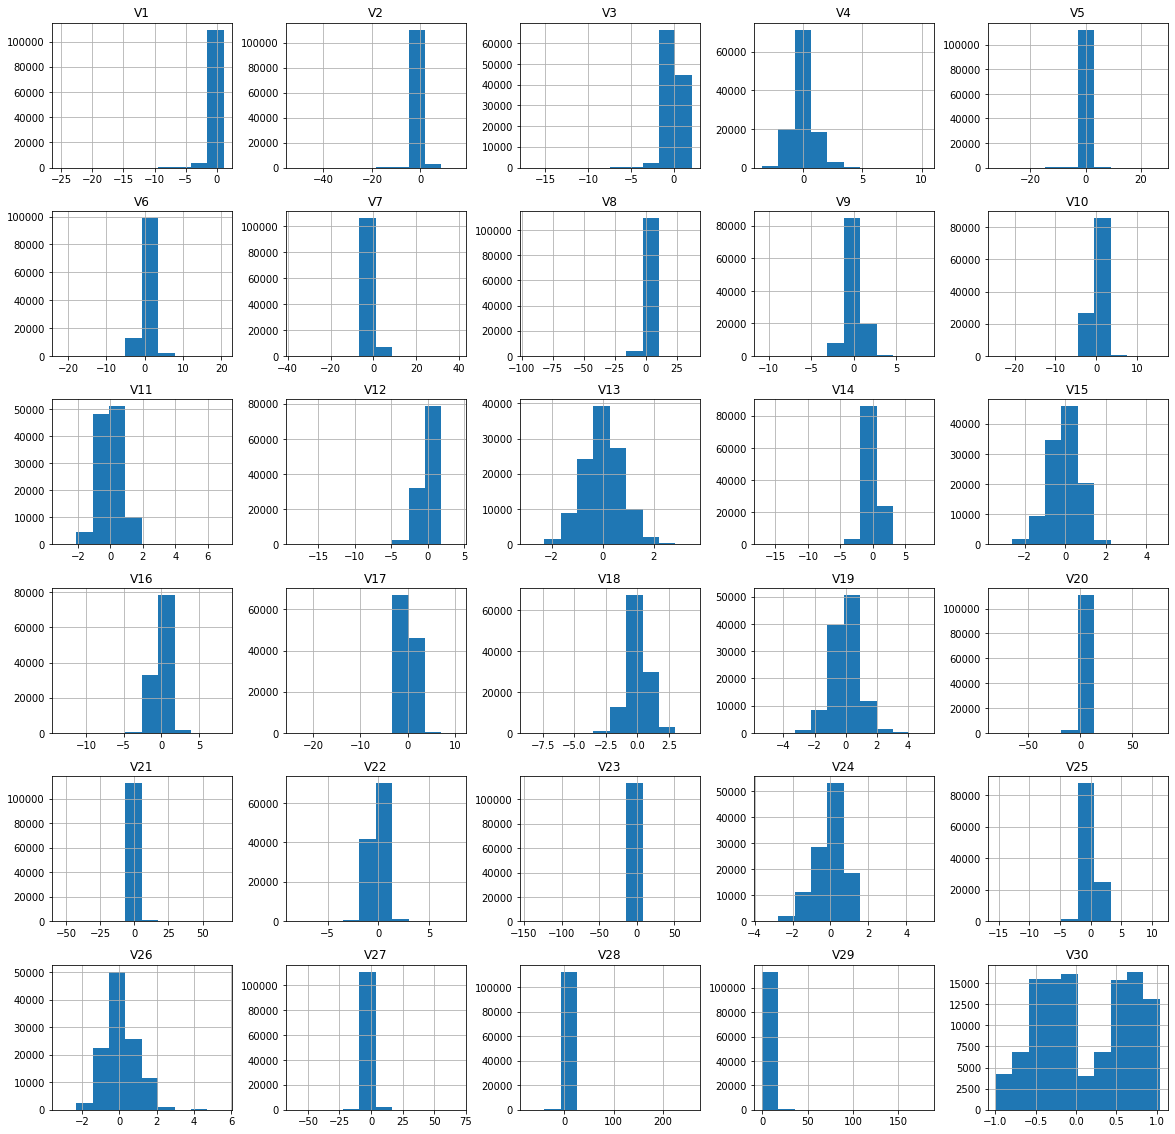

In [ ]:
rbS_train_df.drop(columns=['ID']).hist(figsize = (20,20))
plt.show()

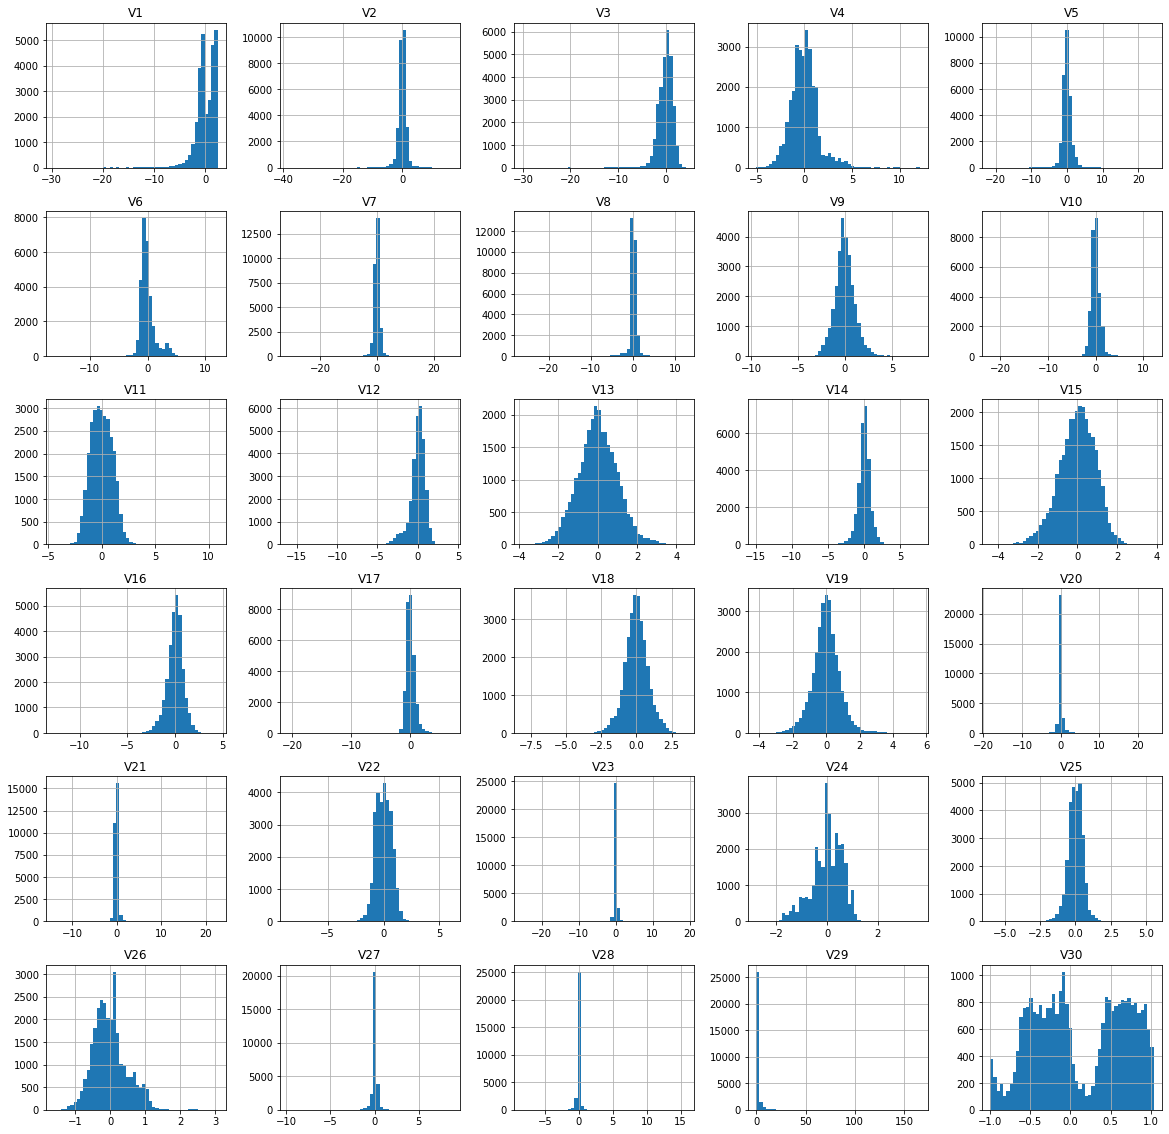

In [ ]:
val_df.drop(columns=['ID', 'Class']).hist(bins = 50, figsize = (20,20))
plt.show()

## outliers 제거


In [ ]:
# remove_ol_train_df = train_df.copy()

In [ ]:
def remove_outlier_test(df, column):
  fraud_column_data = df[column]
  quan_25 = np.percentile(fraud_column_data.values, 25)
  quan_75 = np.percentile(fraud_column_data.values, 75)

  iqr = quan_75 - quan_25
  iqr = iqr * 1.5
  lowest = quan_25 - iqr
  highest = quan_75 + iqr
  outlier_index = fraud_column_data[(fraud_column_data < lowest) | (fraud_column_data > highest)].index
  print(len(outlier_index))
  df.drop(outlier_index, axis=0, inplace=True)
  print(df.shape)
  return df

In [ ]:
# sdS_train_df['V14'].shape

In [ ]:
# remove_outlier_test(rbS_train_df, 'V14')

In [ ]:
# remove_outlier_test(rbS_train_df, 'V17')

In [ ]:
for i in list(rbS_train_df.drop('ID', axis=1).columns):
  print('<',i,'>')
  remove_outlier_test(rbS_train_df, i)


< V1 >
2800
(111042, 31)
< V2 >
3376
(107666, 31)
< V3 >
395
(107271, 31)
< V4 >
4051
(103220, 31)
< V5 >
3196
(100024, 31)
< V6 >
5442
(94582, 31)
< V7 >
1048
(93534, 31)
< V8 >
6129
(87405, 31)
< V9 >
2269
(85136, 31)
< V10 >
3137
(81999, 31)
< V11 >
43
(81956, 31)
< V12 >
4048
(77908, 31)
< V13 >
479
(77429, 31)
< V14 >
2509
(74920, 31)
< V15 >
824
(74096, 31)
< V16 >
2237
(71859, 31)
< V17 >
734
(71125, 31)
< V18 >
2079
(69046, 31)
< V19 >
2099
(66947, 31)
< V20 >
3407
(63540, 31)
< V21 >
323
(63217, 31)
< V22 >
15
(63202, 31)
< V23 >
1449
(61753, 31)
< V24 >
1013
(60740, 31)
< V25 >
453
(60287, 31)
< V26 >
1968
(58319, 31)
< V27 >
6801
(51518, 31)
< V28 >
3098
(48420, 31)
< V29 >
4146
(44274, 31)
< V30 >
0
(44274, 31)


In [ ]:
remove_ol_train_df.drop(columns=['ID']).hist(figsize = (20,20))
plt.show()

NameError: ignored

## Validation set 사기 거래 비율
#### (*) Validation set의 사기 거래 비율이 다른 데이터집합에서도 비슷하게 발생할 것이라고 가정

In [ ]:
val_normal, val_fraud = val_df['Class'].value_counts()
val_contamination = val_fraud / val_normal
print(f'Validation contamination : [{val_contamination}]')

Validation contamination : [0.0010551491277433877]


## Model Define & Fit

In [ ]:
# # Train dataset은 Label이 존재하지 않음
# train_df = train_df.drop(columns=['ID']) # Input Data

In [ ]:
# Train dataset은 Label이 존재하지 않음
rbS_train_df = rbS_train_df.drop(columns=['ID']) # Input Data

In [ ]:
# # Train dataset은 Label이 존재하지 않음
# rbS02_train_df = rbS02_train_df.drop(columns=['ID']) # Input Data

In [ ]:
# # Train dataset은 Label이 존재하지 않음
# train_df = train_df.drop(columns=['ID']) # Input Data

In [ ]:
# # 가설 설정 : Train dataset도 Validation dataset과 동일한 비율로 사기거래가 발생 했을 것이다. -> model parameter : contamination=val_contamination(=0.001055) 적용
# model_originDF = EllipticEnvelope(support_fraction = 0.994, contamination = val_contamination, random_state = 42)
# model_originDF.fit(train_df)

In [ ]:
# 가설 설정 : Train dataset도 Validation dataset과 동일한 비율로 사기거래가 발생 했을 것이다. -> model parameter : contamination=val_contamination(=0.001055) 적용
model = EllipticEnvelope(support_fraction = 0.994, contamination = val_contamination, random_state = 42)
model.fit(rbS_train_df)

EllipticEnvelope(contamination=0.0010551491277433877, random_state=42,
                 support_fraction=0.994)

In [ ]:
# # 가설 설정 : Train dataset도 Validation dataset과 동일한 비율로 사기거래가 발생 했을 것이다. -> model parameter : contamination=val_contamination(=0.001055) 적용
# model_rbS02 = EllipticEnvelope(support_fraction = 0.994, contamination = val_contamination, random_state = 42)
# model_rbS02.fit(rbS02_train_df)

## Evaluation : Validation set

In [ ]:
def get_pred_label(model_pred):
    # IsolationForest 모델 출력 (1:정상, -1:불량(사기)) 이므로 (0:정상, 1:불량(사기))로 Label 변환
    model_pred = np.where(model_pred == 1, 0, model_pred)
    model_pred = np.where(model_pred == -1, 1, model_pred)
    return model_pred

In [ ]:
val_x = val_df.drop(columns=['ID', 'Class']) # Input Data
val_y = val_df['Class'] # Label

val_pred = model.predict(val_x) # model prediction
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.500791131689815]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     28432
           1       0.01      0.70      0.03        30

    accuracy                           0.95     28462
   macro avg       0.51      0.82      0.50     28462
weighted avg       1.00      0.95      0.97     28462



In [ ]:
# val_x = val_df.drop(columns=['ID', 'Class']) # Input Data
# val_y = val_df['Class'] # Label

# val_pred = model_rbS02.predict(val_x) # model prediction
# val_pred = get_pred_label(val_pred)
# val_score = f1_score(val_y, val_pred, average='macro')
# print(f'Validation F1 Score : [{val_score}]')
# print(classification_report(val_y, val_pred))

## Inference : Test set

In [ ]:
test_df = pd.read_csv('./open/test.csv') # Train
test_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,AAAA0x1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,AAAA0x2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983
2,AAAA0x5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960
3,AAAA0x7,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.237686,-0.994937
4,AAAA0xc,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,0.309755,-0.259116,-0.326143,-0.090047,0.362832,0.928904,-0.129487,-0.809979,0.359985,0.707664,0.125992,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.167819,-0.994866


In [ ]:
test_x = test_df.drop(columns=['ID'])

In [ ]:
test_pred = model.predict(test_x) # model prediction
test_pred = get_pred_label(test_pred)

## Submission

In [ ]:
submit = pd.read_csv('./open/sample_submission.csv')
submit.tail()

,ID,Class
142498,0x4587f,1
142499,0x45880,1
142500,0x45884,1
142501,0x45885,1
142502,0x45887,1


In [ ]:
submit['Class'] = test_pred
submit.to_csv('./open/submit_file/[0722_testModel_robustScale&removeOutlier]submit.csv', index=False)